In [ ]:
!pip install minisom
!pip install tslearn

In [10]:
# Native libraries
import os
import math

# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing
from sklearn.preprocessing import MinMaxScaler

# Algorithms
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

##setting Directory for reference files:

#path = 'E:\Project_TUHH\Thesis_1\Sample_code_with_DTW'
#os.chdir(path)


test


ValueError: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 192 from PyObject

In [11]:


from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial.distance as dist



In [12]:
def dp(dist_mat):
    """
    Find minimum-cost path through matrix `dist_mat` using dynamic programming.

    The cost of a path is defined as the sum of the matrix entries on that
    path. See the following for details of the algorithm:

    - http://en.wikipedia.org/wiki/Dynamic_time_warping
    - https://www.ee.columbia.edu/~dpwe/resources/matlab/dtw/dp.m

    The notation in the first reference was followed, while Dan Ellis's code
    (second reference) was used to check for correctness. Returns a list of
    path indices and the cost matrix.
    """

    N, M = dist_mat.shape#N,M have the same shape
    
    # Initialize the cost matrix
    #The numpy. zeros() function returns a new array of given shape and type, with zeros.
    cost_mat = np.zeros((N + 1, M + 1))
    for i in range(1, N + 1):
        cost_mat[i, 0] = np.inf#[i,0] = infinity
    for i in range(1, M + 1):
        cost_mat[0, i] = np.inf#[0,i] = infinity

    # Fill the cost matrix while keeping traceback information
    traceback_mat = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            penalty = [
                cost_mat[i, j],      # match (0)
                cost_mat[i, j + 1],  # insertion (1)
                cost_mat[i + 1, j]]  # deletion (2)
            i_penalty = np.argmin(penalty)
            cost_mat[i + 1, j + 1] = dist_mat[i, j] + penalty[i_penalty]
            traceback_mat[i, j] = i_penalty

    # Traceback from bottom right
    i = N - 1
    j = M - 1
    path = [(i, j)]
    while i > 0 or j > 0:
        tb_type = traceback_mat[i, j]
        if tb_type == 0:
            # Match
            i = i - 1
            j = j - 1
        elif tb_type == 1:
            # Insertion
            i = i - 1
        elif tb_type == 2:
            # Deletion
            j = j - 1
        path.append((i, j))

    # Strip infinity edges from cost_mat before returning
    cost_mat = cost_mat[1:, 1:]
    return (path[::-1], cost_mat)

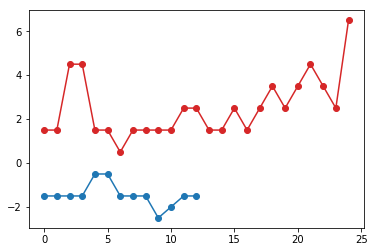

In [18]:
x = np.array([0, 0, 3, 3, 0, 0, -1, 0, 0, 0, 0,1,1,0,0,1,0,1,2,1,2,3,2,1,5])
y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 0, -1, -0.5, 0, 0])

plt.figure(figsize=(6, 4))
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
#plt.axis("off")
#plt.savefig("signals_a_b.pdf")

In [19]:
# Distance matrix
N = x.shape[0]
M = y.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i] - y[j])

Alignment cost: 24.5000
Normalized alignment cost: 0.6447


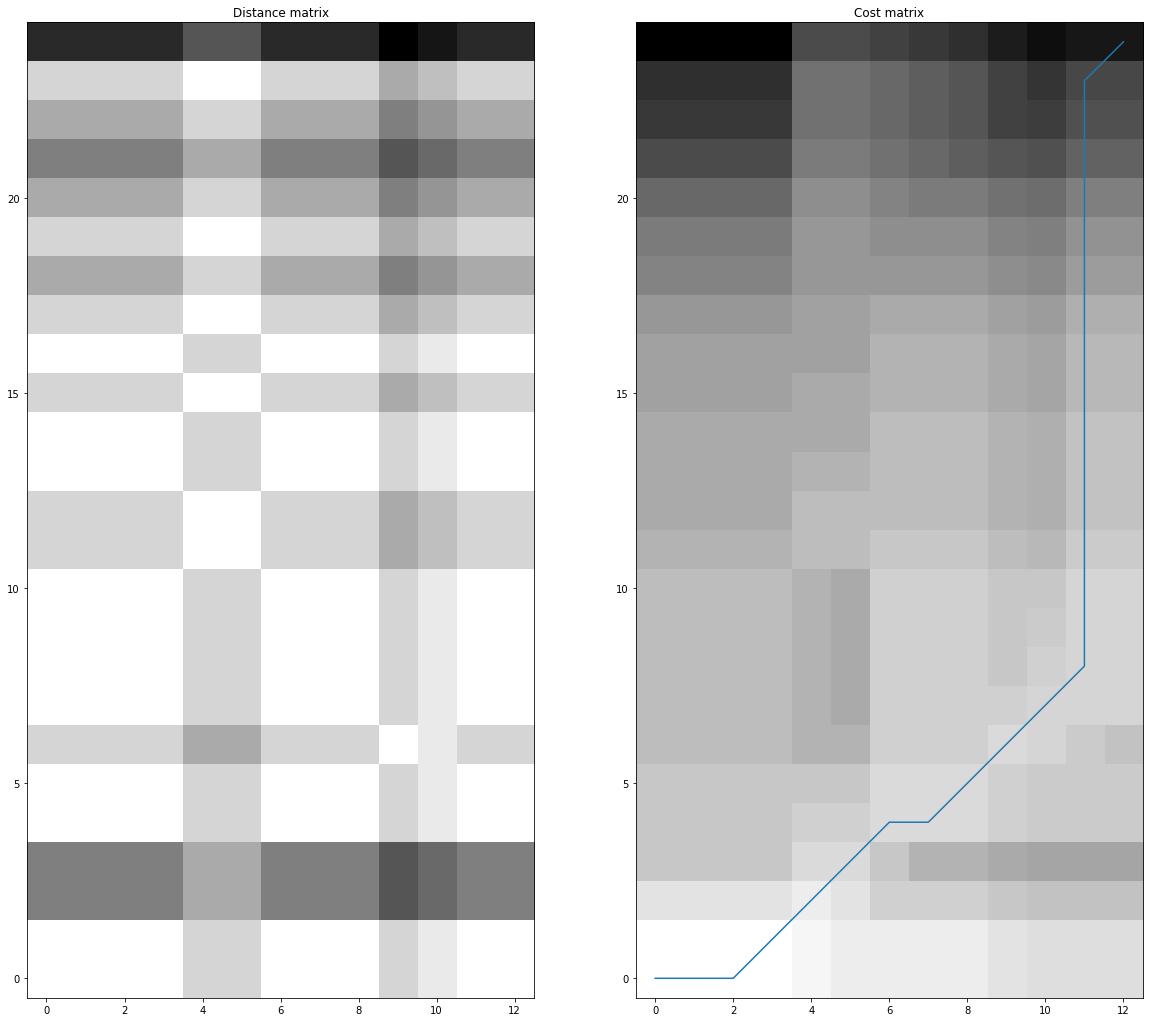

In [15]:
# DTW
path, cost_mat = dp(dist_mat)
print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))

plt.figure(figsize=(20, 30))
plt.subplot(121)
plt.title("Distance matrix")
plt.imshow(dist_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
plt.subplot(122)
plt.title("Cost matrix")
plt.imshow(cost_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
x_path, y_path = zip(*path)
plt.plot(y_path, x_path);

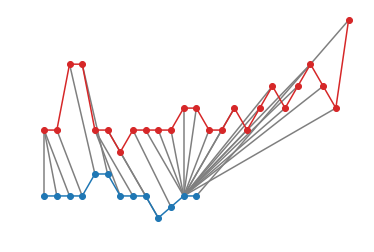

In [16]:
plt.figure()
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 1.5, y[y_j] - 1.5], c="C7")
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")#numpy.arange(start, stop, step, dtype)
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")#1.5 is the equi distance of the 2 signals
plt.axis("off")
plt.savefig("signals_a_b_align.pdf")

In [ ]:
a = np.array([0, 0, 1, 1, 0, 0, -1, 0, 0, 0, 0])
b = np.array([0, 0, 0, 0, 1, 1, 0, 0, 0, -1, -0.5, 0, 0])
c = np.array([0, 0, 0, -1, -1, 0, 0, 0, 0.5, 0, 0, 0, 0])
d = np.array([0, 0, 0.25, 1, 0, 0.5, 0])

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(323)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(324)
ax4 = fig.add_subplot(326)
# fig = plt.figure(figsize=(6, 8))
ax1.plot(np.arange(a.shape[0]), a, "-o", c="C0")
ax2.plot(np.arange(c.shape[0]), c, "-o", c="C1")
ax3.plot(np.arange(d.shape[0]), d, "-o", c="C2")
ax4.plot(np.arange(b.shape[0]), b, "-o", c="C3")
for ax in [ax1, ax2, ax3, ax4]:
    #ax.axis("off")
    ax.set_xlim([-0.5, 13.5])
    ax.set_ylim([-1.05, 1.05])
plt.savefig("dtw_knn.pdf")
    
for cur_b in [c, d, b]:

    # Distance matrix
    N = a.shape[0]
    M = cur_b.shape[0]
    dist_mat = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
    #         print(a[i], b[j], abs(a[i] - b[j]))
            dist_mat[i, j] = abs(a[i] - cur_b[j])

    # DTW
    path, cost_mat = dp(dist_mat)
    print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
    print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))
    print()

In [ ]:
x = np.array([0, 2, 0, 1, 0, 0])
y = np.array([0, 0, 0.5, 2, 0, 1, 0])

plt.figure(figsize=(6, 4))
plt.plot(np.arange(x.shape[0]) + 1, x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]) + 1, y - 1.5, "-o", c="C0")
plt.axis("off")
plt.savefig("signals_a_b_ex2.pdf")

In [ ]:
# Distance matrix
N = x.shape[0]
M = y.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i] - y[j])

# DTW
path, cost_mat = dp(dist_mat)

# Plot alignment
plt.figure(figsize=(6, 4))
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 1.5, y[y_j] - 1.5], c="C7")
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off");

In [ ]:
plt.figure(figsize=(6, 4))
plt.imshow(cost_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
x_path, y_path = zip(*path)
plt.plot(y_path, x_path)
plt.xlabel("$j$")
plt.ylabel("$i$");

In [ ]:
x = np.array([0, 0, 1, 1, 0, 0, -1, 0, 0, 0, 0,1,1,0,0,1,0,1,2,1,2,3,2,1,5])
y = np.array([0, 0, 0, 1, 1, 0, 0, 0, 0.5, 0, 0, 0, 0,0,1,2])

plt.figure(figsize=(6, 4))
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off")
#plt.savefig("signals_a_b.pdf")

In [ ]:


# Distance matrix
N = x.shape[0]
M = y.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i] - y[j])

# DTW
path, cost_mat = dp(dist_mat)
print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))

# Plot alignment
plt.figure(figsize=(6, 4))
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 1.5, y[y_j] - 1.5], c="C7")
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off");

In [ ]:
#!pip install librosa

from scipy.io import wavfile
import IPython.display as ipyd
import librosa as lr
import librosa.display
from glob import glob



#from scipy.io import wavfile
#import IPython.display as ipyd
#import librosa
#import librosa.display




In [ ]:
import pandas as pd

In [ ]:
#x_fn = "audio/hello1.wav"
# x_fn = "audio/hello2.wav"
#samplerate, data = wavfile.read('./output/audio.wav')
#x_fn = "./file_example_WAV_1MG.wav"
#x_fn = "audio/goodbye.wav"
#f_s, x = wavfile.read(x_fn)
#ipyd.Audio(rate=f_s, data=x)


In [ ]:
#loading audio file
data_dir = path
audio_files = glob(path + '/*.wav')#to run this code first run line 29 as there
                                    #are the path directory for this code.
len(audio_files)

In [ ]:
# reading audio file 1

audio, sfreq = lr.load(audio_files[0])# first audio file is always [0]. the second one is 1 and
                                        # so on.
time_1 = np.arange(0, len(audio))/ sfreq

fig, ax = plt.subplots()
ax.plot(time_1, audio)
ax.set(xlabel = 'Time(s)', ylabel= 'sound Amp')
plt.show()

In [ ]:
# reading audio file 2

audio, sfreq = lr.load(audio_files[1])# first audio file is always [0]. the second one is 1 and
                                        # so on.
time_2 = np.arange(0, len(audio))/ sfreq

fig, ax = plt.subplots()
ax.plot(time_2, audio)
ax.set(xlabel = 'Time(s)', ylabel= 'sound Amp')
plt.show()

In [ ]:

#tik.tik
#audio_files = glob(path + '/*.wav')
x_fn = "tik.tik.wav"
f_s , x = wavfile.read(x_fn)
#ipyd.Audio(rate=x, data=f_s)

In [ ]:
#tik_dhik
#y_fn = "tik_dhik.wav"
#f_s, y = wavfile.read(y_fn)
#ipyd.Audio(rate=f_s, data=y)

In [ ]:
# Mel-scale spectrogram
n_fft = int(0.025*f_s)      # 25 ms
hop_length = int(0.01*f_s)  # 10 ms
mel_spec_x = librosa.feature.melspectrogram(
    x_fn/1.0, sr=f_s, n_mels=40,
    n_fft=n_fft, hop_length=hop_length
    )
log_mel_spec_x = np.log(mel_spec_x)

# Plot log-Mel spectrogram
fig, ax = plt.subplots(figsize=(9, 5))
ax.imshow(log_mel_spec_x, origin="bottom", interpolation="nearest");
plt.ylabel("Feature dimensions")
plt.xlabel("Frames");

## Implementation : 

##### https://towardsdatascience.com/an-illustrative-introduction-to-dynamic-time-warping-36aa98513b98

#### Let’s import all python packages we need.

In [ ]:
import pandas as pd
import numpy as np# Plotting Packages
import matplotlib.pyplot as plt
import seaborn as sbn# Configuring Matplotlib
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
savefig_options = dict(format="png", dpi=300, bbox_inches="tight")# Computation packages
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

In [ ]:
def compute_euclidean_distance_matrix(x, y) -> np.array:
    """Calculate distance matrix
    This method calcualtes the pairwise Euclidean distance between two sequences.
    The sequences can have different lengths.
    """
    dist = np.zeros((len(y), len(x)))
    for i in range(len(y)):
        for j in range(len(x)):
            dist[i,j] = (x[j]-y[i])**2
    return dist

In [ ]:
def compute_accumulated_cost_matrix(x, y) -> np.array:
    """Compute accumulated cost matrix for warp path using Euclidean distance
    """
    distances = compute_euclidean_distance_matrix(x, y)

    # Initialization
    cost = np.zeros((len(y), len(x)))
    cost[0,0] = distances[0,0]
    
    for i in range(1, len(y)):
        cost[i, 0] = distances[i, 0] + cost[i-1, 0]  
        
    for j in range(1, len(x)):
        cost[0, j] = distances[0, j] + cost[0, j-1]  

    # Accumulated warp path cost
    for i in range(1, len(y)):
        for j in range(1, len(x)):
            cost[i, j] = min(
                cost[i-1, j],    # insertion
                cost[i, j-1],    # deletion
                cost[i-1, j-1]   # match
            ) + distances[i, j] 
            
    return cost

In [ ]:
# Create two sequences
x = [3, 1, 2, 2, 1]
y = [2, 0, 0, 3, 3, 1, 0]

### Compute DTW Distance and Path

In [ ]:
# computing Distance
dtw_distance, warp_path = fastdtw(x, y, dist=euclidean)

#Computing path
cost_matrix = compute_accumulated_cost_matrix(x, y)

In [ ]:


fig, ax = plt.subplots(figsize=(8, 8))
ax = sbn.heatmap(cost_matrix, annot=True, square=True, linewidths=0.1, cmap="YlGnBu", ax=ax)
ax.invert_yaxis()

# Get the warp path in x and y directions
path_x = [p[0] for p in warp_path]
path_y = [p[1] for p in warp_path]

# Align the path from the center of each cell
path_xx = [x+0.5 for x in path_x]
path_yy = [y+0.5 for y in path_y]

ax.plot(path_xx, path_yy, color='blue', linewidth=3, alpha=0.2)

fig.savefig("ex1_heatmap.png", **savefig_options)

In [ ]:
cost_matrix = compute_accumulated_cost_matrix(x, y)
# Flipping the cost matrix for easier comparison with heatmap values!
print(np.flipud(cost_matrix)) 

##### The cost matrix is printed above has similar values to the heatmap.

##### Now let’s plot the two sequences and connect the mapping points.
##### The code to plot the DTW distance between x and y is given below.

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))

# Remove the border and axes ticks
fig.patch.set_visible(False)
ax.axis('off')

for [map_x, map_y] in warp_path:
    ax.plot([map_x, map_y], [x[map_x], y[map_y]], '--k', linewidth=4)

ax.plot(x, '-ro', label='x', linewidth=4, markersize=20, markerfacecolor='lightcoral', markeredgecolor='lightcoral')
ax.plot(y, '-bo', label='y', linewidth=4, markersize=20, markerfacecolor='skyblue', markeredgecolor='skyblue')
ax.set_title("DTW Distance", fontsize=28, fontweight="bold")

fig.savefig("ex1_dtw_distance.png", **savefig_options)

# Example 2

#### In this example, we will use two sinusoidal signals and 
#### see how they will be matched by calculating the DTW distance between them.

In [ ]:
time1 = np.linspace(start=0, stop=1, num=50)
time2 = time1[0:40]

x1 = 3 * np.sin(np.pi * time1) + 1.5 * np.sin(4*np.pi * time1)
x2 = 3 * np.sin(np.pi * time2 + 0.5) + 1.5 * np.sin(4*np.pi * time2 + 0.5) 

In [ ]:
distance, warp_path = fastdtw(x1, x2, dist=euclidean)

In [ ]:
fig, ax = plt.subplots(figsize=(16, 12))

# Remove the border and axes ticks
fig.patch.set_visible(False)
ax.axis('off')

for [map_x, map_y] in warp_path:
    ax.plot([map_x, map_y], [x1[map_x], x2[map_y]], '-k')

ax.plot(x1, color='blue', marker='o', markersize=10, linewidth=5)
ax.plot(x2, color='red', marker='o', markersize=10, linewidth=5)
ax.tick_params(axis="both", which="major", labelsize=18)

fig.savefig("ex2_dtw_distance.png", **savefig_options)